In [1]:
%pylab inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm



figsize(10,6)
plt.rcParams['figure.dpi'] = 300

plt.style.use('ggplot')
#plt.rcParams['font.family'] = 'Myriad Pro'
plt.rcParams['text.color'] = '#555555'

Populating the interactive namespace from numpy and matplotlib


C:\Users\Danny\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Load data

df = pd.read_csv('games_Jan2018.csv')
df.set_index('id', inplace=True)

df.type.value_counts()

# Let's filter out expansions, and focus our analysis on base games
df = df[df.type == 'boardgame']

# A little bit of data cleaning to set zeros to NAs where they should be NAs
df[['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage']] = \
  df[['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage']].replace(0,pd.np.nan)

enough_ratings = df.users_rated >= 150
enough_weights = df.total_weights >= 150
enough_ratings.sum(), enough_weights.sum()

(6455, 1081)

In [4]:
plt.style.use('ggplot')
#plt.rcParams['font.family'] = 'Myriad Pro'
plt.rcParams['text.color'] = '#555555'

# Load data

In [5]:
df = pd.read_csv('games_Jan2018.csv')
df.set_index('id', inplace=True)

In [6]:
df.type.value_counts()

boardgame             80105
boardgameexpansion    15672
Name: type, dtype: int64

In [7]:
# Let's filter out expansions, and focus our analysis on base games
df = df[df.type == 'boardgame']

In [8]:
# A little bit of data cleaning to set zeros to NAs where they should be NAs
df[['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage']] = \
  df[['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage']].replace(0,pd.np.nan)

In [9]:
enough_ratings = df.users_rated >= 150
enough_weights = df.total_weights >= 150
enough_ratings.sum(), enough_weights.sum()

(6455, 1081)

# Complexity / weight

BGG allows users to rate the "weight" or complexity of a game. 
This is a single measure for each game from a scale from 1-5 and it doesn't decouple the different types of complexity 
(e.g. Chess that's relatively easy in terms of rules, but can be quite complex in terms of how to use those rules to play as opposed to Terra Mystica, where it take a while to learn all the rules, but once you've got the hang of the rules, the gameplay
is relatively straight forward)

N.B. There's probably elegant terminology for these different types of complexity. Colm may know the answer.


Let's find out how reliable this information is by running some rodimentary tests against some simple intuition-based proxies for complexity

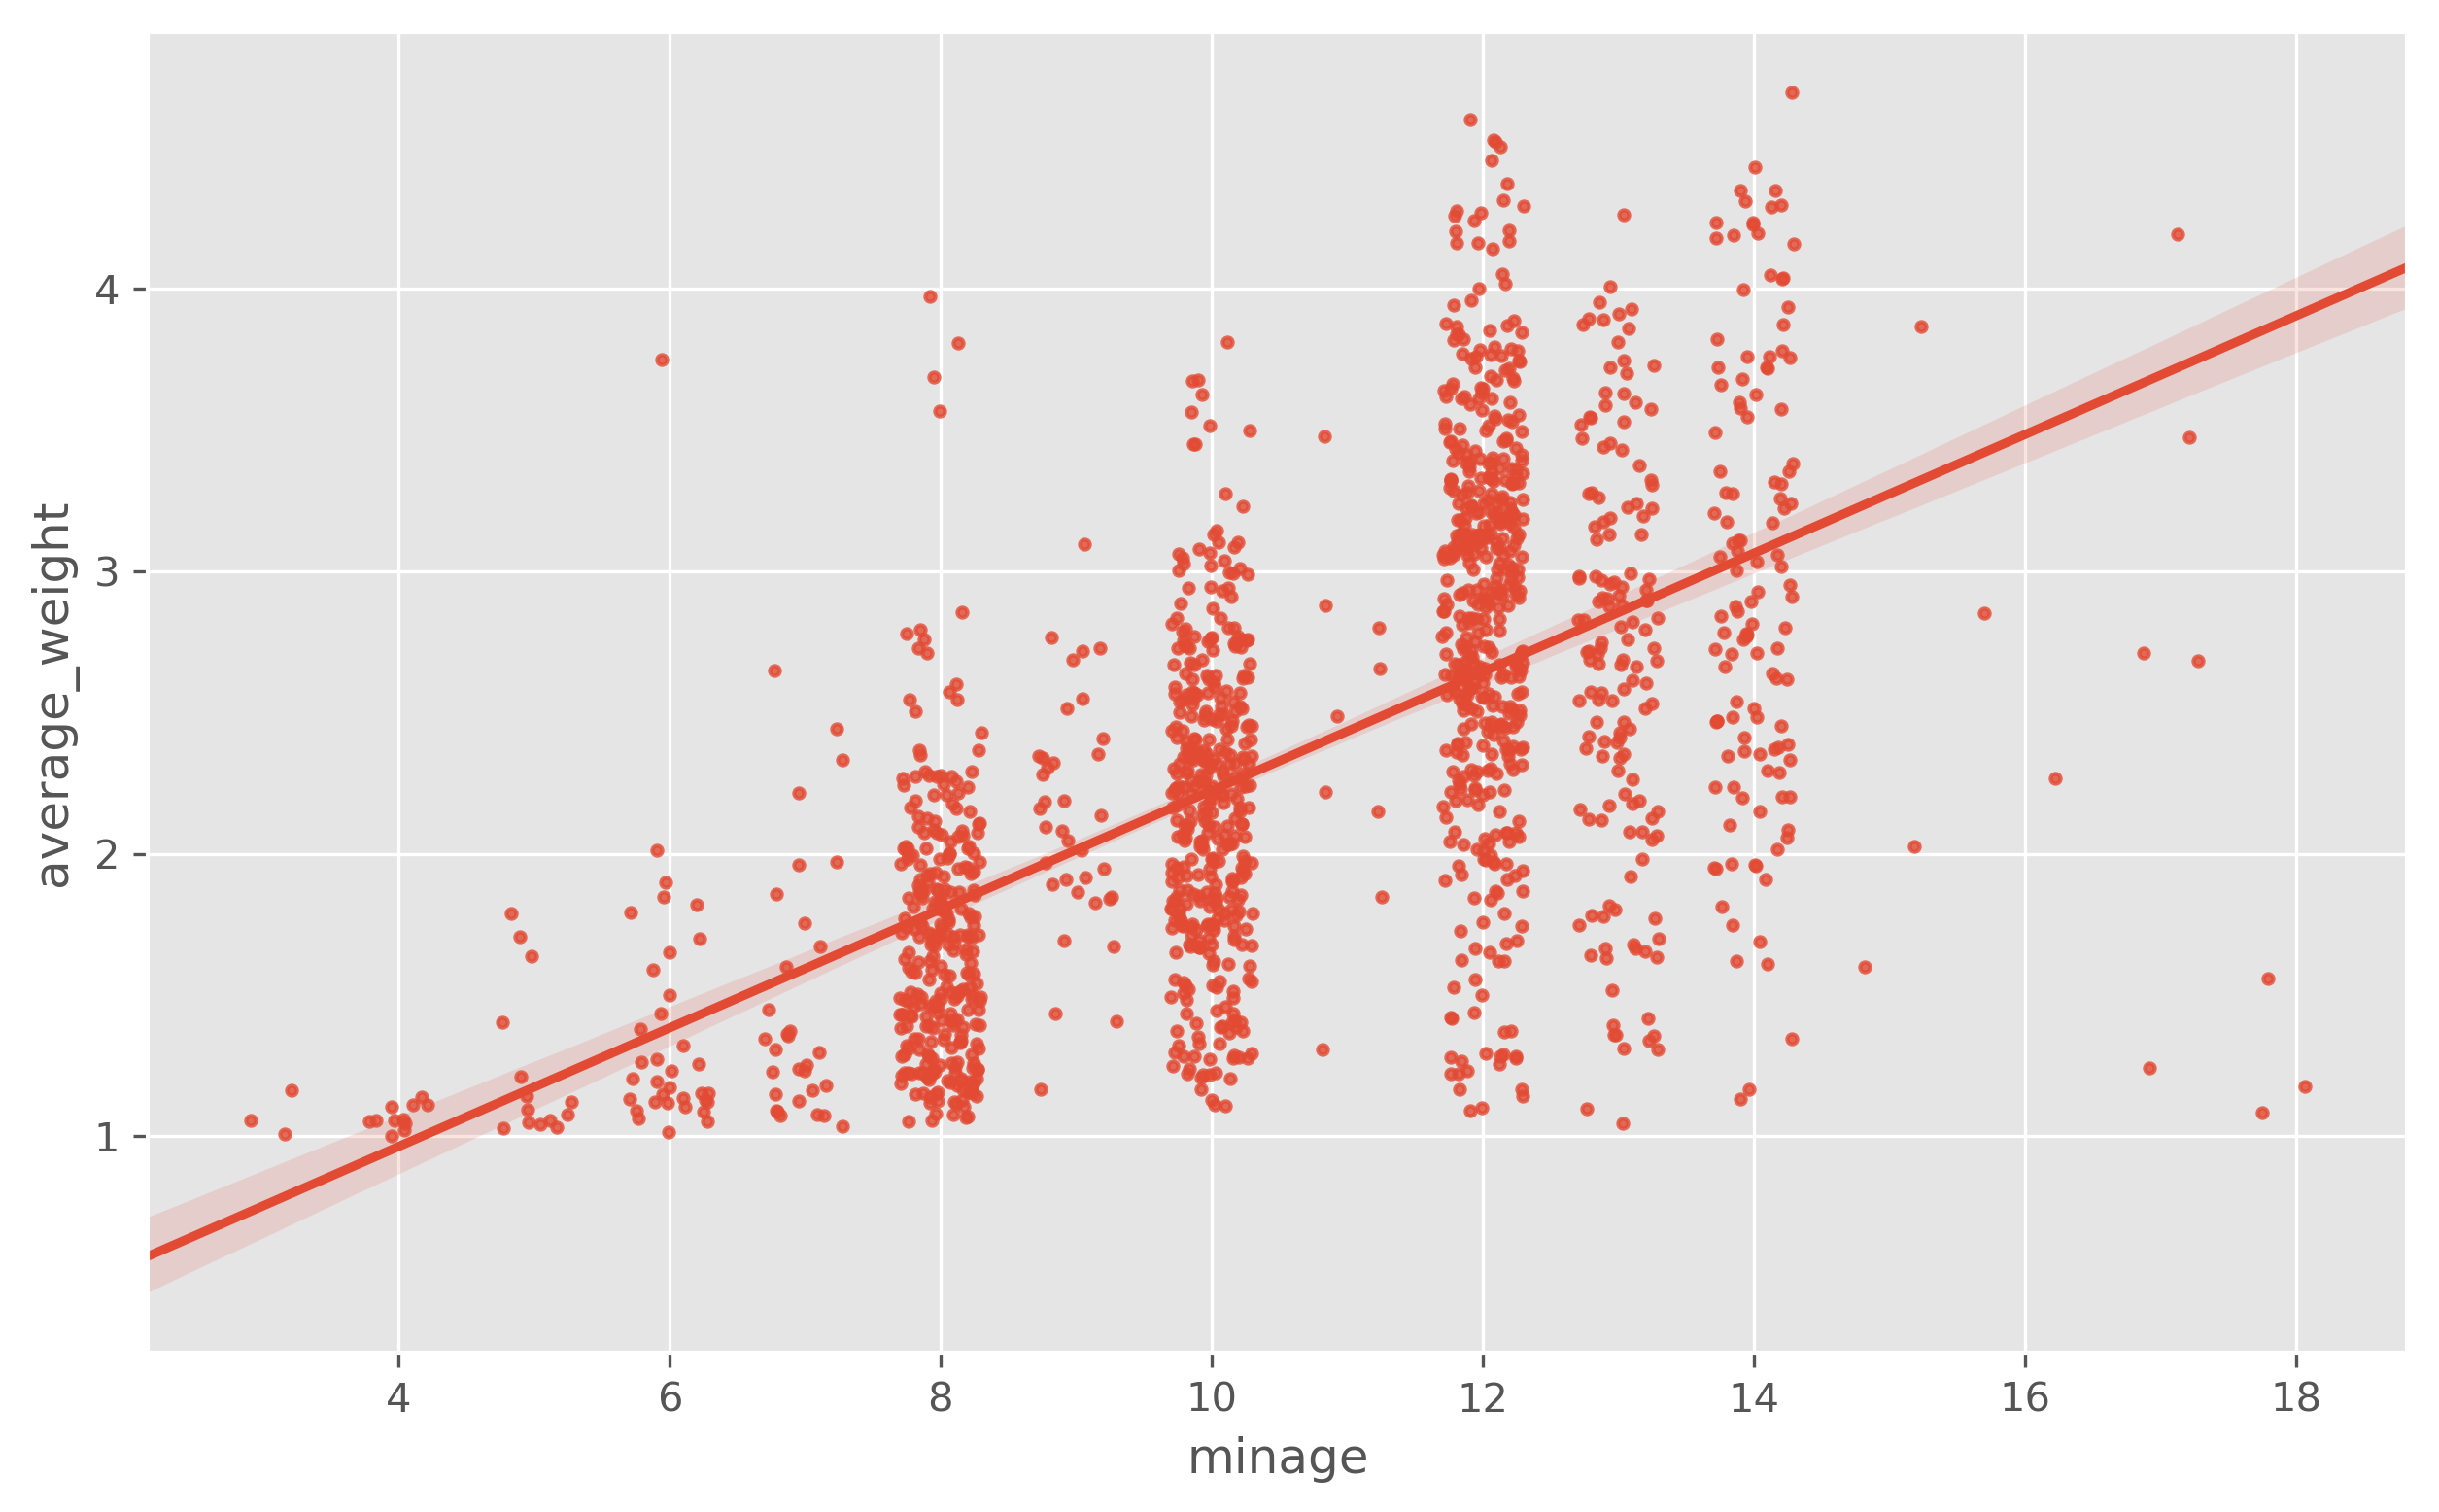

In [10]:
# Testing weight rating against minimum age

sns.regplot(x='minage', y='average_weight', data=df[df.total_weights>100], x_jitter=.3, scatter_kws={'s':6})

Min age is a loose proxy for complexity, but it can also be filtered due to content type such as very 
explicit material e.g. Cards against Humanity)

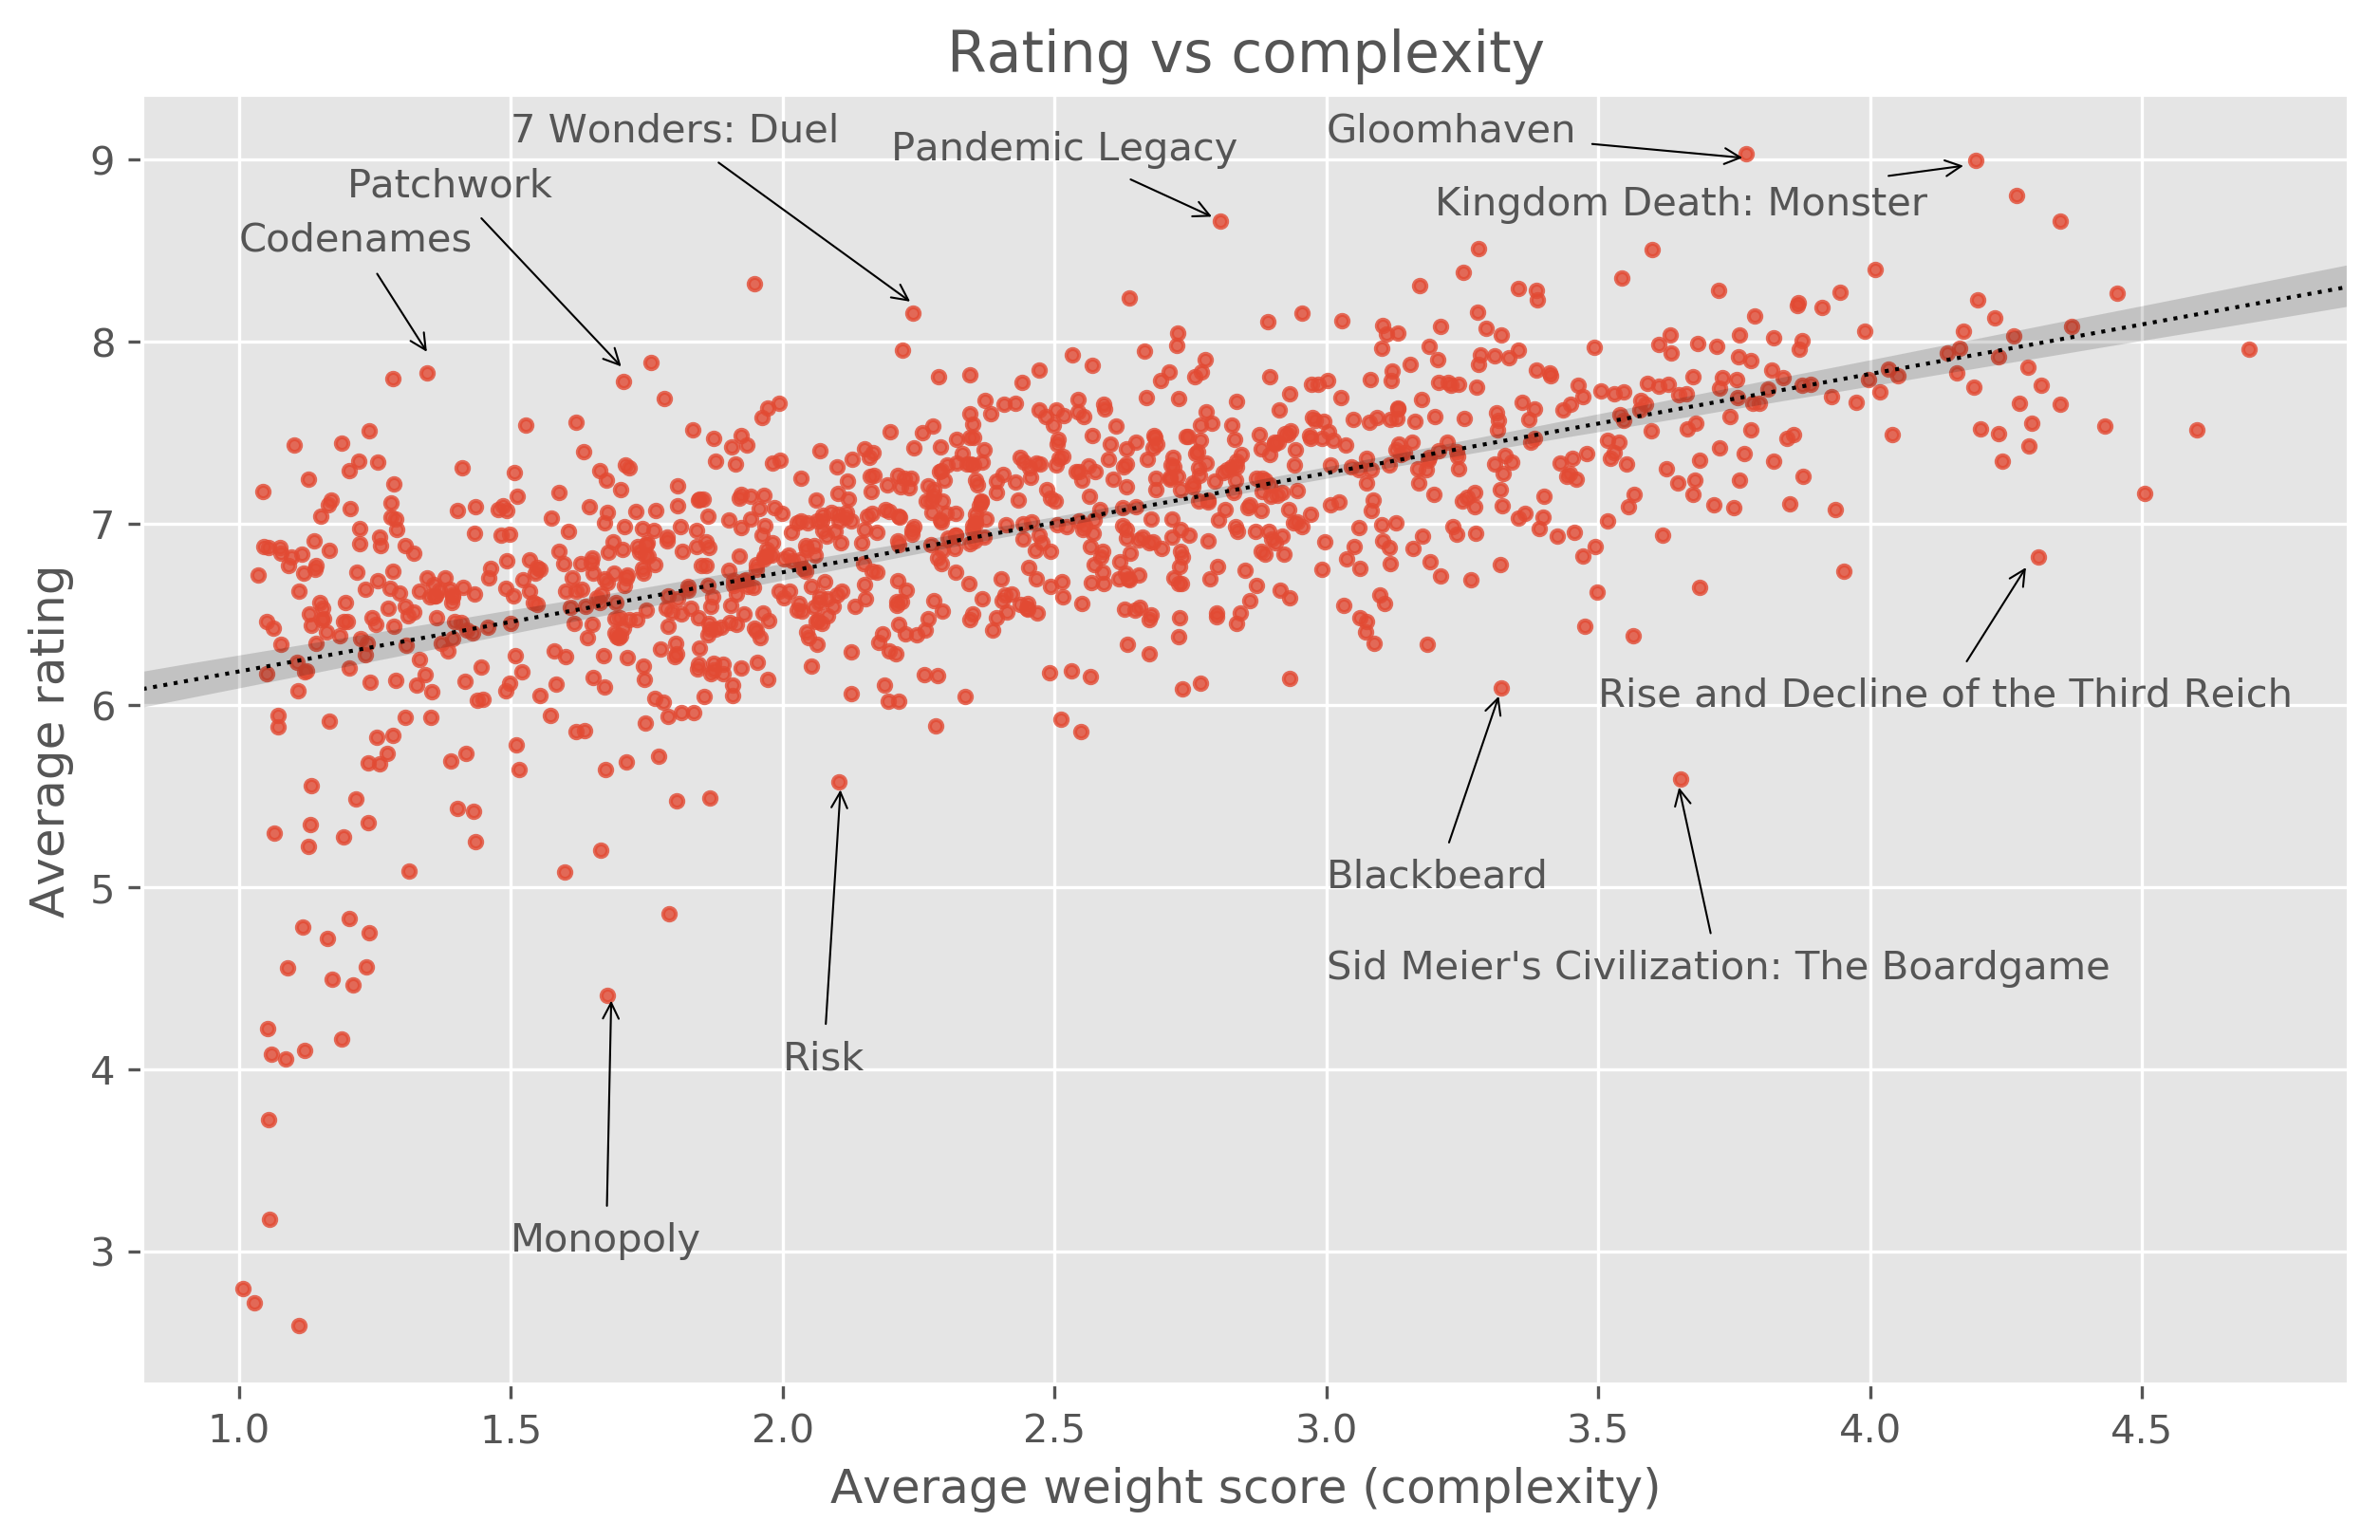

In [12]:
cax = sns.regplot(x='average_weight',
            y='average_rating',
            data=df[enough_weights],
            scatter_kws={'alpha':0.8,
                         's':10,
                         'color':None,
                         'cmap':'seismic_r',},
            line_kws={'lw':1,
                      'ls':':',
                      'color':'k'})


plt.gca().annotate('Monopoly', xy=(1.685, 4.42057), xytext=(1.5,3), arrowprops=dict(facecolor='black', arrowstyle="->",edgecolor='k'))
plt.gca().annotate("Sid Meier's Civilization: The Boardgame", xy=(3.6454, 5.59183), xytext=(3,4.5), arrowprops=dict(facecolor='black', arrowstyle="->",edgecolor='k'))
plt.gca().annotate("Risk", xy=(2.1072, 5.57929), xytext=(2,4), arrowprops=dict(facecolor='black', arrowstyle="->",edgecolor='k'))
plt.gca().annotate("Gloomhaven", xy=(3.78, 9.00657), xytext=(3,9.1), arrowprops=dict(facecolor='black', arrowstyle="->",edgecolor='k'))
plt.gca().annotate("Kingdom Death: Monster", xy=(4.186, 8.97231), xytext=(3.2,8.7), arrowprops=dict(facecolor='black', arrowstyle="->",edgecolor='k'))
plt.gca().annotate("Pandemic Legacy", xy=(2.8026, 8.66878), xytext=(2.2,9.0), arrowprops=dict(facecolor='black', arrowstyle="->",edgecolor='k'))
plt.gca().annotate("Codenames", xy=(1.3535, 7.90691), xytext=(1.0,8.5), arrowprops=dict(facecolor='black', arrowstyle="->",edgecolor='k'))
plt.gca().annotate("7 Wonders: Duel", xy=(2.2463, 8.19443), xytext=(1.5,9.1), arrowprops=dict(facecolor='black', arrowstyle="->",edgecolor='k'))
plt.gca().annotate("Patchwork", xy=(1.7131, 7.83136), xytext=(1.2,8.8), arrowprops=dict(facecolor='black', arrowstyle="->",edgecolor='k'))
plt.gca().annotate("Blackbeard", xy=(3.3218, 6.09174), xytext=(3,5), arrowprops=dict(facecolor='black', arrowstyle="->",edgecolor='k'))
plt.gca().annotate("Rise and Decline of the Third Reich", xy=(4.2945, 6.79503), xytext=(3.5,6), arrowprops=dict(facecolor='black', arrowstyle="->",edgecolor='k'))

plt.ylabel('Average rating')
plt.xlabel('Average weight score (complexity)')
plt.title('Rating vs complexity')


#ax1 = plt.gcf().add_axes([0.91, 0.125, 0.01, 0.75])
#norm = mpl.colors.Normalize(vmin=3, vmax=5)
#cb1 = mpl.colorbar.ColorbarBase(ax1, cmap='seismic_r',
#                                norm=norm,
#                                orientation='vertical')
#cb1.set_ticks([pd.np.arange(3,6,1)])
#cb1.set_ticklabels(['1,000','10,000','100,000'])
#cb1.set_label('Number of owners')

plt.gcf().set_size_inches(10,6)


In [13]:
pd.np.polyfit(df[enough_weights & (df.average_weight>1.5)].average_weight, df[enough_weights & (df.average_weight>1.5)].average_rating,1)

array([0.48932139, 5.80326323])

In [14]:
df['rating_residual'] = df.average_rating - (df.average_weight * 0.48932139 + 5.80326323)
df['corrected_rating'] = df['rating_residual'] + df[enough_ratings].average_rating.mean()
df['bayes_corrected_rating'] = (df.users_rated *df['corrected_rating'] + 5.5*1000) / (df.users_rated + 1000)
df['BGG_rank'] = df.bayes_average_rating.replace(0.000, pd.np.nan).rank(method='min', ascending=False)
df['corrected_BGG_rank'] = df[df.users_rated >=30].bayes_corrected_rating.replace(0.00,pd.np.nan).rank(method='min', ascending=False)
df['rating_change'] = df['bayes_corrected_rating'] - df['bayes_average_rating']
df['rank_change'] = df['BGG_rank'] - df['corrected_BGG_rank']

In [63]:
df.to_csv('complexity_corrected_data.csv')

In [15]:
# Let's get the top games after correcting for the complexity bias
df.sort_values('bayes_corrected_rating', ascending=False).head(100)#.to_clipboard()

,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,...,categories,mechanics,designers,rating_residual,corrected_rating,bayes_corrected_rating,BGG_rank,corrected_BGG_rank,rating_change,rank_change
id,,,,,,,,,,,,,,,,,,,,,
161936,boardgame,Pandemic Legacy: Season 1,2015.0,2.0,4.0,60.0,60.0,60.0,13.0,22780,...,"Environmental,Medical","Action Point Allowance System,Co-operative Pla...","Rob Daviau,Matt Leacock",1.485613,8.042503,7.935585,2.0,1.0,-0.561605,1.0
178900,boardgame,Codenames,2015.0,2.0,8.0,15.0,15.0,15.0,14.0,37430,...,"Card Game,Deduction,Party Game,Spies/Secret Ag...","Memory,Partnerships,Pattern Recognition,Press ...",Vlaada Chvátil,1.368031,7.924920,7.861821,38.0,2.0,0.128641,36.0
173346,boardgame,7 Wonders Duel,2015.0,2.0,2.0,30.0,30.0,30.0,10.0,27303,...,"Ancient,Card Game,City Building,Civilization","Card Drafting,Set Collection","Antoine Bauza,Bruno Cathala",1.259197,7.816087,7.734255,9.0,3.0,-0.279005,6.0
174430,boardgame,Gloomhaven,2017.0,1.0,4.0,150.0,90.0,150.0,12.0,8852,...,"Adventure,Economic,Exploration,Fantasy,Fightin...","Action / Movement Programming,Co-operative Pla...",Isaac Childres,1.383600,7.940490,7.692775,1.0,4.0,-0.808665,-3.0
521,boardgame,Crokinole,1876.0,2.0,4.0,30.0,30.0,30.0,8.0,8321,...,Action / Dexterity,Partnerships,(Uncredited),1.363224,7.920114,7.660473,69.0,5.0,0.110523,64.0
163412,boardgame,Patchwork,2014.0,2.0,2.0,30.0,15.0,30.0,8.0,23968,...,"Abstract Strategy,Puzzle","Tile Placement,Time Track",Uwe Rosenberg,1.144454,7.701344,7.613177,50.0,6.0,-0.046753,44.0
160069,boardgame,Ticket to Ride: 10th Anniversary,2014.0,2.0,5.0,60.0,30.0,60.0,8.0,4018,...,"Trains,Travel","Hand Management,Route/Network Building,Set Col...",Alan R. Moon,1.562404,8.119294,7.597314,45.0,7.0,-0.095066,38.0
209010,boardgame,Mechs vs. Minions,2016.0,2.0,4.0,90.0,60.0,90.0,14.0,7773,...,"Fantasy,Fighting,Miniatures,Video Game Theme","Action / Movement Programming,Card Drafting,Co...","Chris Cantrell,Rick Ernst,Stone Librande,Prash...",1.256830,7.813720,7.549988,21.0,8.0,-0.324382,13.0
194655,boardgame,Santorini,2016.0,2.0,4.0,20.0,20.0,20.0,8.0,8216,...,"Abstract Strategy,Ancient,Mythology","Grid Movement,Tile Placement,Variable Player P...",Gord!,1.219550,7.776440,7.529430,67.0,9.0,-0.040150,58.0


In [16]:
# Biggest winners
df[(df.BGG_rank <= 100) | (df.corrected_BGG_rank <= 100)].sort_values('rank_change', ascending=False)

,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,...,categories,mechanics,designers,rating_residual,corrected_rating,bayes_corrected_rating,BGG_rank,corrected_BGG_rank,rating_change,rank_change
id,,,,,,,,,,,,,,,,,,,,,
92415,boardgame,Skull,2011.0,3.0,6.0,45.0,45.0,45.0,14.0,6663,...,"Bluffing,Card Game","Auction/Bidding,Hand Management,Player Elimina...",Hervé Marly,0.728615,7.285505,7.052502,471.0,89.0,0.186322,382.0
143741,boardgame,BANG! The Dice Game,2013.0,3.0,8.0,15.0,15.0,15.0,8.0,12442,...,"American West,Bluffing,Deduction,Dice,Fighting...","Dice Rolling,Partnerships,Player Elimination,P...","Michael Palm,Lukas Zach",0.589038,7.145928,7.023481,460.0,100.0,0.145661,360.0
168584,boardgame,Love Letter: Batman,2015.0,2.0,4.0,20.0,20.0,20.0,10.0,3785,...,"Card Game,Deduction","Hand Management,Player Elimination",Seiji Kanai,0.940089,7.496979,7.079637,438.0,80.0,0.179367,358.0
12942,boardgame,No Thanks!,2004.0,3.0,7.0,30.0,20.0,30.0,8.0,15705,...,Card Game,"Auction/Bidding,Press Your Luck,Set Collection",Thorsten Gimmler,0.675958,7.232848,7.129116,399.0,66.0,0.188606,333.0
1353,boardgame,Time's Up!,1999.0,4.0,18.0,90.0,90.0,90.0,12.0,4108,...,"Humor,Party Game","Acting,Memory,Partnerships",Peter Sarrett,0.941155,7.498044,7.106885,376.0,73.0,0.145055,303.0
166384,boardgame,Spyfall,2014.0,3.0,8.0,15.0,15.0,15.0,12.0,12349,...,"Bluffing,Deduction,Humor,Party Game,Spies/Secr...","Role Playing,Voting",Alexandr Ushan,0.686515,7.243405,7.112803,363.0,72.0,0.137423,291.0
133473,boardgame,Sushi Go!,2013.0,2.0,5.0,15.0,15.0,15.0,8.0,20924,...,Card Game,"Card Drafting,Hand Management,Set Collection,S...",Phil Walker-Harding,0.752655,7.309545,7.227008,333.0,48.0,0.212028,285.0
121288,boardgame,Dixit: Journey,2012.0,3.0,6.0,30.0,30.0,30.0,8.0,3589,...,"Card Game,Humor,Party Game","Acting,Simultaneous Action Selection,Singing,S...",Jean-Louis Roubira,1.030832,7.587722,7.132781,348.0,64.0,0.138251,284.0
131357,boardgame,Coup,2012.0,2.0,6.0,15.0,15.0,15.0,9.0,23779,...,"Bluffing,Card Game,Deduction,Party Game,Political","Memory,Player Elimination,Take That,Variable P...",Rikki Tahta,0.586874,7.143764,7.077427,361.0,81.0,0.100087,280.0


In [17]:
# Biggest losers
df[(df.BGG_rank <= 100) | (df.corrected_BGG_rank <= 100)].sort_values('rank_change', ascending=True).head(50)#.to_clipboard()

,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,...,categories,mechanics,designers,rating_residual,corrected_rating,bayes_corrected_rating,BGG_rank,corrected_BGG_rank,rating_change,rank_change
id,,,,,,,,,,,,,,,,,,,,,
125153,boardgame,The Gallerist,2015.0,1.0,4.0,150.0,60.0,150.0,13.0,4734,...,Economic,"Commodity Speculation,Set Collection,Worker Pl...",Vital Lacerda,0.139652,6.696542,6.487867,68.0,566.0,-1.069813,-498.0
70149,boardgame,Ora et Labora,2011.0,1.0,4.0,180.0,60.0,180.0,13.0,8006,...,"City Building,Economic,Industry / Manufacturin...","Modular Board,Pattern Building,Set Collection,...",Uwe Rosenberg,0.058555,6.615445,6.491589,82.0,561.0,-1.004531,-479.0
12493,boardgame,Twilight Imperium (Third Edition),2005.0,3.0,6.0,240.0,180.0,240.0,14.0,16070,...,"Civilization,Negotiation,Political,Science Fic...","Action Point Allowance System,Area-Impulse,Dic...",Christian T. Petersen,0.038945,6.595834,6.531638,44.0,521.0,-1.161022,-477.0
62219,boardgame,Dominant Species,2010.0,2.0,6.0,240.0,120.0,240.0,14.0,13782,...,"Animals,Environmental,Prehistoric","Area Control / Area Influence,Card Drafting,Gr...",Chad Jensen,0.071701,6.628590,6.552242,48.0,487.0,-1.114628,-439.0
161970,boardgame,Alchemists,2014.0,2.0,4.0,120.0,120.0,120.0,13.0,11591,...,"Deduction,Fantasy","Action Point Allowance System,Card Drafting,Ha...",Matúš Kotry,0.071304,6.628193,6.538590,75.0,508.0,-0.979660,-433.0
9609,boardgame,War of the Ring (first edition),2004.0,2.0,4.0,120.0,120.0,120.0,12.0,9111,...,"Adventure,Dice,Fantasy,Miniatures,Novel-based,...","Action Point Allowance System,Area Control / A...","Roberto Di Meglio,Marco Maggi,Francesco Nepitello",0.116984,6.673873,6.557775,74.0,480.0,-0.967105,-406.0
103343,boardgame,A Game of Thrones: The Board Game (Second Edit...,2011.0,3.0,6.0,240.0,120.0,240.0,14.0,20014,...,"Bluffing,Fantasy,Negotiation,Novel-based,Polit...","Area Control / Area Influence,Area Movement,Au...",Christian T. Petersen,0.117030,6.673920,6.618056,76.0,403.0,-0.898914,-327.0
91,boardgame,Paths of Glory,1999.0,2.0,2.0,480.0,480.0,480.0,14.0,3759,...,"Wargame,World War I","Campaign / Battle Card Driven,Dice Rolling,Poi...",Ted Raicer,0.346013,6.902903,6.608114,90.0,415.0,-0.848046,-325.0
126042,boardgame,Nations,2013.0,1.0,5.0,200.0,40.0,200.0,14.0,8944,...,"Card Game,Civilization,Economic","Card Drafting,Variable Player Powers","Rustan Håkansson,Nina Håkansson,Einar Rosén,Ro...",0.183351,6.740240,6.615518,84.0,406.0,-0.859452,-322.0


### Rendering animated graph

In [18]:
%matplotlib inline

In [19]:
plt.rcParams['figure.dpi'] = 300

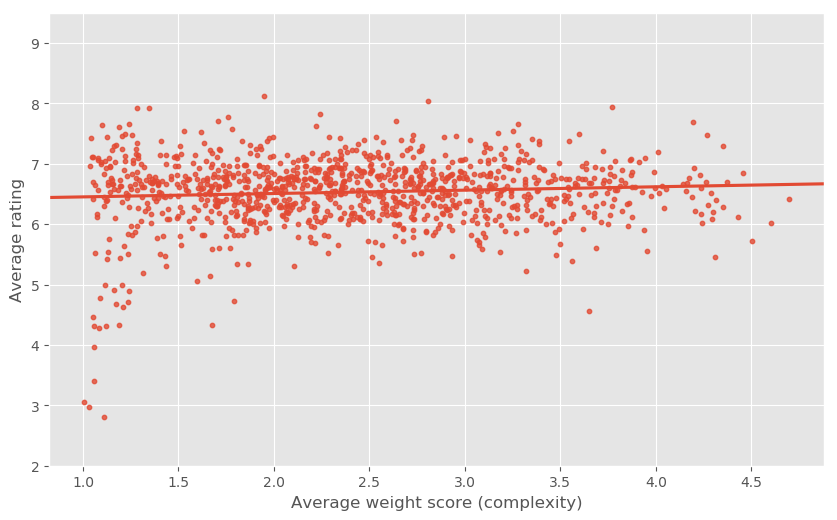

In [20]:
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
fps=25
writer = FFMpegWriter(fps=fps, metadata=metadata)

fig = plt.figure(figsize=(10,6), dpi=100)

def make_frame(t):
    plt.cla()
    if t < 1:
        w=0.0
    elif t < 3:
        w=(t-1)/2.0
    else:
        w=1.0
    sns.regplot(x=df[enough_weights].average_weight ,
                y= (1-w) * df[enough_weights].average_rating + w * df[enough_weights].corrected_rating,
                ci=None,
                scatter_kws={'alpha':0.8,
                             's':10})
    
    plt.ylabel('Average rating')
    plt.xlabel('Average weight score (complexity)')
    
    return (None)

with writer.saving(fig, "manual_animtion.mp4", 150):
    for t in pd.np.arange(0,4+1./fps,1./fps):
        make_frame(t)
        plt.ylim(2, 9.5)

        writer.grab_frame()

In [21]:
# Convert the mp4 to gif using ffmpeg
# the code below does that, including a gif palette optimization

# #!/bin/sh
# 
# palette="/tmp/palette.png"
# 
# filters="fps=25,scale=750:-1:flags=lanczos"
# 
# ffmpeg -v warning -i manual_animtion.mp4 -vf "$filters,palettegen" -y $palette
# ffmpeg -v warning -i manual_animtion.mp4 -i $palette -lavfi "$filters [x]; [x][1:v] paletteuse" -y manual_animtion.gif

### Rendering interactive complexity vs rating plot

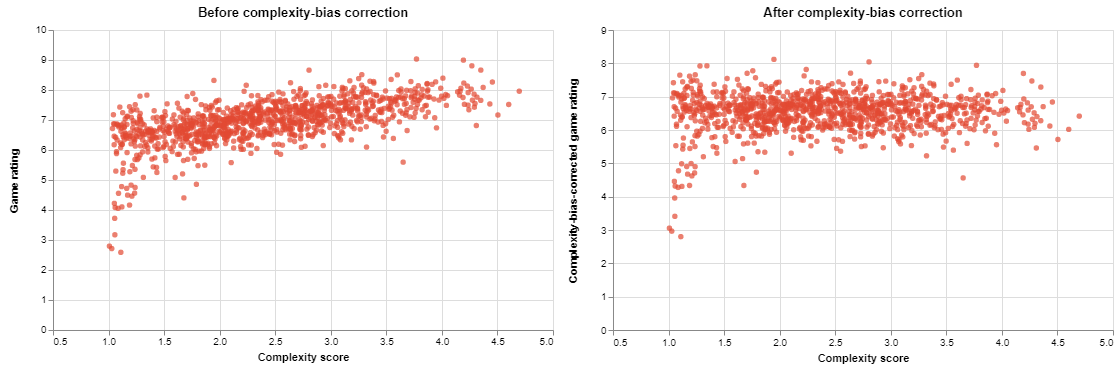

In [22]:
# Iinteractive plot using Altair

import altair as alt
#from vega_datasets import data
alt.renderers.enable('notebook')

#iris = data.iris()
relevant_columns=['average_weight', 'average_rating', 'corrected_rating', 'name']

before_correction = alt.Chart(df[enough_weights][relevant_columns]).mark_point(filled=True).encode(
    alt.X('average_weight', axis=alt.Axis(title='Complexity score'), scale=alt.Scale(domain=(.8, 5))),
    alt.Y('average_rating', axis=alt.Axis(title='Game rating')),
    color=alt.value("#E24A33"),
    tooltip='name'
).properties(width=500, title='Before complexity-bias correction')

after_correction = alt.Chart(df[enough_weights][relevant_columns]).mark_point(filled=True).encode(
    alt.X('average_weight', axis=alt.Axis(title='Complexity score'), scale=alt.Scale(domain=(.8, 5))),
    alt.Y('corrected_rating', axis=alt.Axis(title='Complexity-bias-corrected game rating')),
    color=alt.value("#E24A33"),
    tooltip='name'
).properties(width=500, title='After complexity-bias correction')

alt.HConcatChart([before_correction, after_correction])#.save('interactive_chart.html')

In [29]:
# Altair's API is pretty slick, but it doesn't seem flexible enough to accommodate what I'm trying to do
# There's no intuitive way to get multiline hover tooltips

In [30]:
# Let's generate it using Bokeh instead...

In [27]:
from bokeh.plotting import figure, output_file, output_notebook, show, ColumnDataSource
from bokeh.models import HoverTool

#output_file("toolbar.html")
output_notebook()

source = ColumnDataSource(data=df[enough_weights][['name', 'average_weight', 'average_rating', 'corrected_rating', 'BGG_rank', 'corrected_BGG_rank']])

hover = HoverTool(tooltips=[
    ("Name", "@name"),
    ("Average weight (complexity)", "@average_weight"),
    ("Original rating", "@average_rating"),
    ("Corrected rating", "@corrected_rating"),
    ("Original rank", "@BGG_rank"),
    ("Corrected rank", "@corrected_BGG_rank"),
])

p = figure(plot_width=800, plot_height=450, tools=[hover],
           title="Game ratings after complexity-bias correction")

p.circle('average_weight',
         'corrected_rating',
         size=4,
         source=source,
         color='#E24A33')

p.title.align = 'center'
p.title.text_font = 'Open Sans'
p.xaxis.axis_label = 'Average weight score (Complexity)'
p.xaxis.axis_label_text_font_style = "normal"
p.xaxis.axis_label_text_font = 'Open Sans'
p.yaxis.axis_label = 'Average rating'
p.yaxis.axis_label_text_font_style = "normal"
p.yaxis.axis_label_text_font = 'Open Sans'
show(p)

Loading BokehJS ...